# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**After running the agent.py with default settings, the smartcab (white vehicle) doesn't move despite whatever the traffic light is and road condition. The agent was not given a deadline to meet either. So it always remain idle at the same intersection. The rewards are numerical number, which constantly changes while the traffic light color changes at the same time. While remaining at the same intersection, the agent was awarded a number for stopping at the intersection. As the traffic light turn green and the agent still remins at the intersection, a negative reward was given. In terms of the values for reward received, stopping at green light lead to a negative reward with much large absolute value compared to stopping at red light.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**The agent.py file. There are many flags. For examples, in environment, num_dummies: is a flag to decide how many dummy agents will be present in the created environment. Increasing the number will have more dummy agents on the streets.
learning is a boolean flag, which decides whether the driving agent will use Q-learning or not in the learning process.
n_test is a flag in the simulator, which determines how many testing trials will be performed.


The Environment.py file. There are four classes in the file and they are Agent, DummyAgent, Environment, and Trafficlight. DummyAgent and Trafficlight will operate independently of actions an agent takes. Agent is the parent class for DummyAgent. Environment has a function called act(), which consider an action and perform legal actions. 

In the simulator.py file, render_text() basically is the text output version of render(). Messages regarding simulation trial data displayed in the prompt window was generated by the render_text() function. On the other hand, GUI version of the simulated trial data are converted to graphic interpretation in the pygame GUI window. At the same time, information regarding rewards and actions or deadline are displayed on the top bar of the GUI window.    

In the planner.py file, the if structure is written in the sequence of making a judgement about the displacement first by looking at dx and dy are simultaneously zero. if both are zero, then  will not check further. if dx is not equal to zero,i.e., still away from the destination along horizontal coordinates, the program will check the multiplication of dx and heading[0], which is the east or west direction flag. if dx*heading[0] and heading [0]is less than zero, then check dy to decide whether to head north (dy>0) or south (dy<0). Therefore, the next_waypoint() function consider the East-West direction before North-South. if no East-west distance is found between smartcar and destination, the next_waypoint() will consider North-south first and then consider East-west while heading towards destination.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


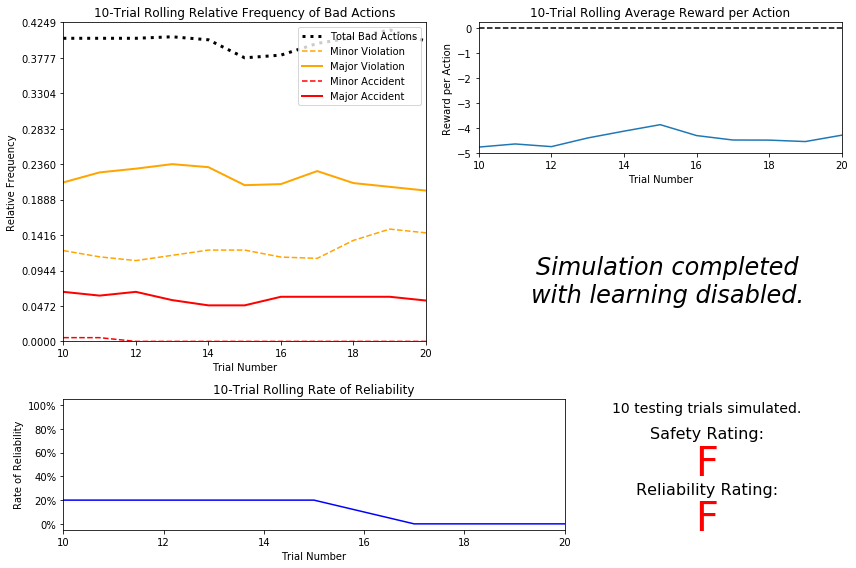

In [2]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**

1. The agent approximately made bad decisions 38 to 40% of the times. On average, by looking at the first plot, about 8% led to major accidents and ~ 2% minor accidents. Thus, ~10 % the times accidents happens. When a bad decision was made, there is a 25% chance that it may lead to an accident.
2. Because the agent is driving randomly, the rate of reliability does not make sense because it is worse than a drunk driver.
3. the agent received negative rewards for all the actions it took. As the simulation process suggested, bad decisions often led to negative rewards of larger absolute numeric values. Thus, yes, bad decisions are penalized heavily compared to good ones.
4. No much. Actually, it seemed that the smartcab agent is behaving even more poorly as the number of trials increased, but statistically, I would be hesitant to make a judgement based on the limited number of samples we have.
5. No. the smartcab should not be considered safe because the frequency of accidents and violations are way too high to be considered safe driving. Even one accident would fail the safety rating and our current agent tends to make more than that. Also, the agent only makes to destination 10% of the time, so it failed the reliability metric board miserably as well.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer:**

The environment data, waypoint, inputs, and deadline, are all relevant for learning both safety and efficiency. 

waypoint: based on the location of smartcab, comme up with the direction that the smartcab should take next. This information is important to ensure that the agent to get to the destination using a route as short as possible, which is related to efficiency.

inputs: this sensor data tells the agent about its surroundings when it was presented with waypoint information before taking its action. Therefore, 'light' tells that whether it is safe to enter the intersection, 'left','oncoming', or 'right' tells whether it would be okay to turn on green, so as not to bump into some vehicle already occupying the space. so this feature is critical to ensure safety of the smartcab.

deadline: one of the metrics in determine the reliability is getting the customer to destination in time. Thus, this is important to ensure that the agent will take into account the time/steps remaining to get to the destination.

A closer examniation of the aforementioned information showed that, though highly relevant, not all features are critical to ensure the safety and efficiency. 

Input,'right', the direction of vehicle on the right is not critical. When the traffic light for the agent is red, whatever direction the vechile on the right is going to take have no interaction with the smartcab because the smartcab will only take a right turn if needed. When the smartcab's traffic light is 'green', the smartcab would have the right of way and thus any actions the vehicle on the right is taking, it would not be the smartcab agent's fault and thus beyond smartcab's control should there be any accidents.

Might as well, input, 'left', the direction of car on the left becomes only critical information when it is going through the intersection, i.e., 'oncoming'. Therefore, instead of training on four options, we can reduce the features to 'others' or 'oncoming'. However, because it is not allowed to re-engineer the features. we may take a chance to train the smartcab without considering the direction of vehicle on the left to see how it perform.

Deadline is important to ensure efficiency, but it has so many discrete levels, even at 5% intervals. With a grid size of 8x6, it usually would not take more than 20 steps, including idling, to get to destination. Thus, it would be really cubersome to train if we include deadline as one parameter, something to do with curse of dimensionality.


### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**

Waypoint variable has 3 different values. Input 'light' has two valid values. Input 'oncoming' and 'left' each has 4 valid values. So if we multiple them together, we have 4x4x3x2. That is 96 different combinations, that is, the size of the state space. But if we skip input 'left', where a combination of left 'oncoming' and waypoint of 'right' account for ~1% of chance to occur if every state has the same probability, we only have to deal with 24 different states.Thus, this would be way easier to train when compared to the 96 different states. Thus, we could try 24 state space instead of 96 to figure out if such configuration would allow us to reach optimal policy within a reasonable number of training trials.     


### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

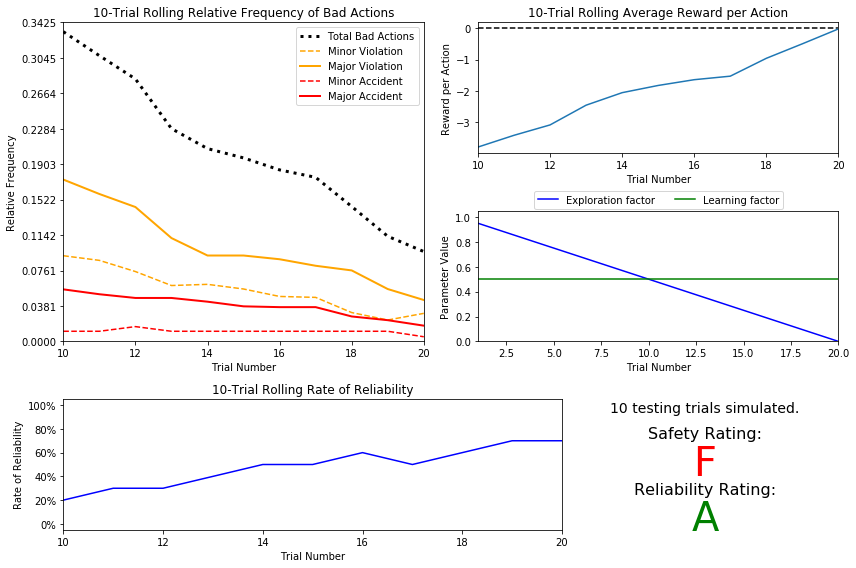

In [4]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation with 4 inputs: waypoint,inputs['light'],inputs['oncoming'], inputs['left']
vs.plot_trials('sim_default-learning4in.csv')

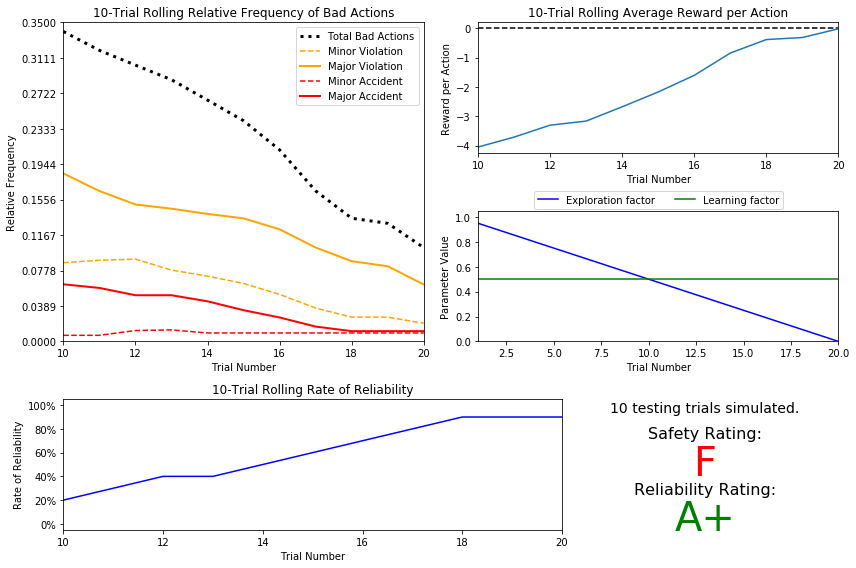

In [5]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation with 3 inputs: waypoint,inputs['light'],inputs['oncoming']
vs.plot_trials('sim_default-learning3in.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**

On average, the driving agent makes bad decisions about 15% to 30% of the time. Out of those bad decisions, about 2 to 4% of the times major accidents happen. Minor accidents are less frequent and occurs about 2% of the time. 
Because the driving agent was learning with default setting. it appeared that the reliability rate did make some sense because its score was gradually improving as more training became available.
The agent only receive reward of +1 or +2 minus timeline penalty for valid actions with no violations. However, should there be any violation, the reward was heavily penalized ranging from -5 for minor violation to -40 for major accident. Thus, rewards system basically said that good behavior resulted in small favorable gains while even a minor bad decisions could negate all previous havested rewards. 
As the number of trials increases. we did observed significantly improvement over the course of training. All frequencies related to bad decisions went down rapidly while rate of reliability and rolling average of rewards went up as more training was done. 
At this point, the smartcab agent could be considered reliable but not safe because the safety rating is still an F. However, the reliability was either an A or an A+ for using 4 or 3 sensor inputs.

Between basic drving agent and the default Q-learning agent, we saw that the bad decisions and related violation frequencies did not quite went down to zero after 20 training session. That is why the safety rating was an F for both setups.
With a linear decay function and default tolerance level at 0.05, the driving agent would require the minimum of training trials, i.e., 20, to train. As we have discussed in question 5, the available states could be as many as 96 or 24 depending whether we would take 4 or 3 sensor inputs for the model. 20 may seemed a good starting point, but may not be enough.
Because we implemented a linear decay function vs trial number, we could observed the plot in the middele right showing up a straight line with negative slope. it started out at 0.95 and ran till it reduced to zero. 
As the number of training trials increased, the number of bad actions significantly decreased and the average reward increased gradually. All the plots showed that the driving agent is learning on the go during training session.
The safety is still an F but the reliability has significantly increased, bumped up from a disappointing F to a stellar A+ for default Q-learning with 3 sensor inputs.


-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

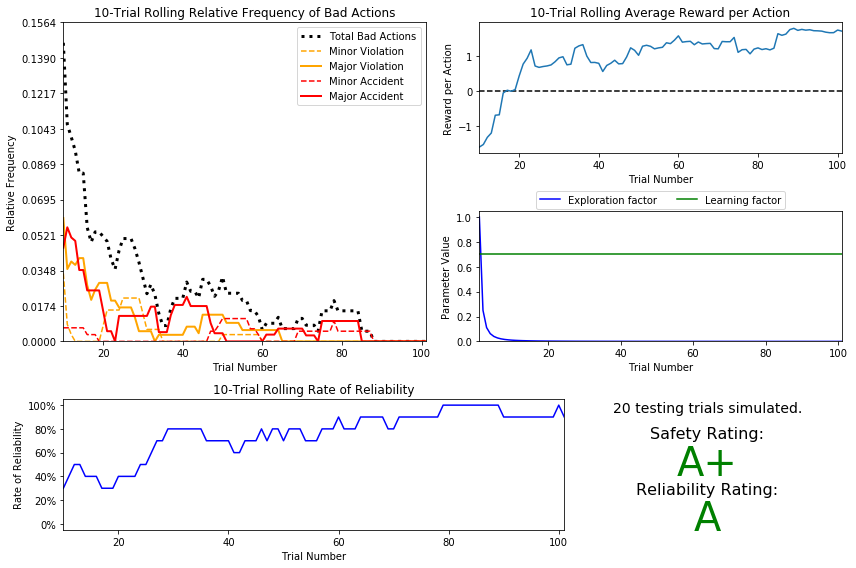

In [33]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation with 4 sensor inputs
vs.plot_trials('sim_improved-learning-tsq.csv')
# epsilon=1, alpha=0.7, tolerance=0.0001, n_test=20

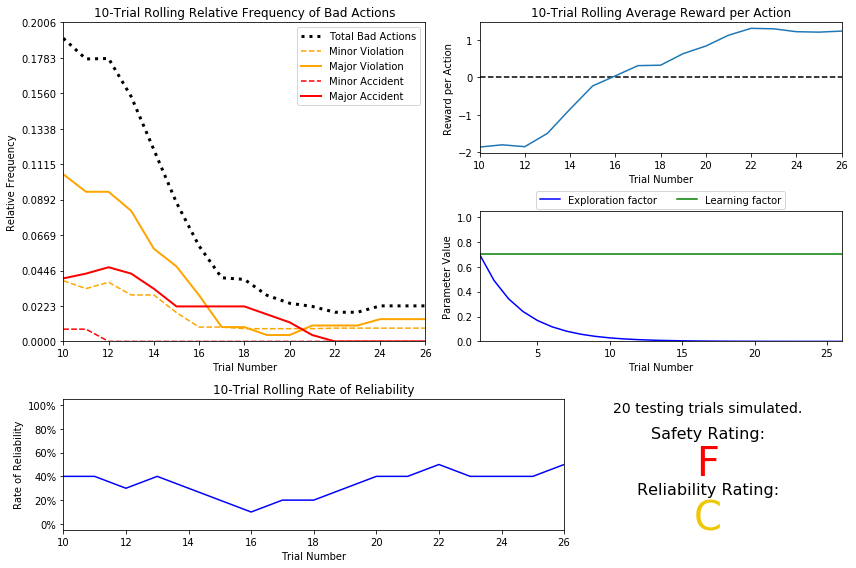

In [19]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation and power decay function
vs.plot_trials('sim_improved-learning-pow.csv')

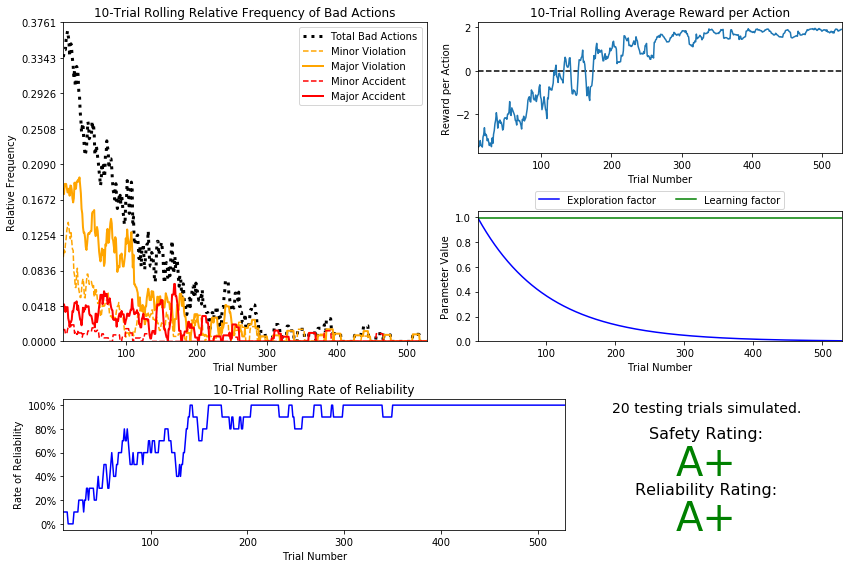

In [47]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation and power decay function
vs.plot_trials('sim_improved-learning-pow099005.csv')
# epsilon=1, alpha=0.99, tolerance=0.005, n_test=20

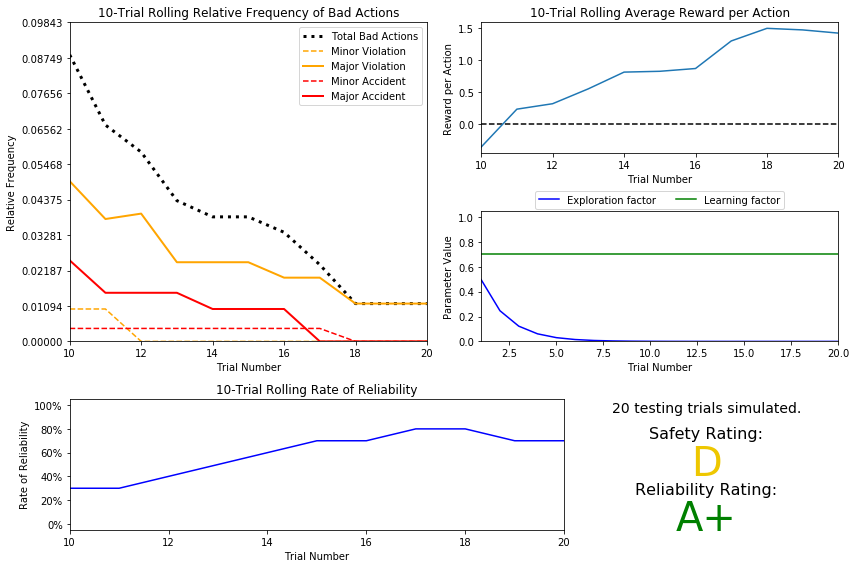

In [32]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation with exponential decay function
vs.plot_trials('sim_improved-learning-exp.csv')
# epsilon=1, alpha=0.7, tolerance=0.0001, n_test=20

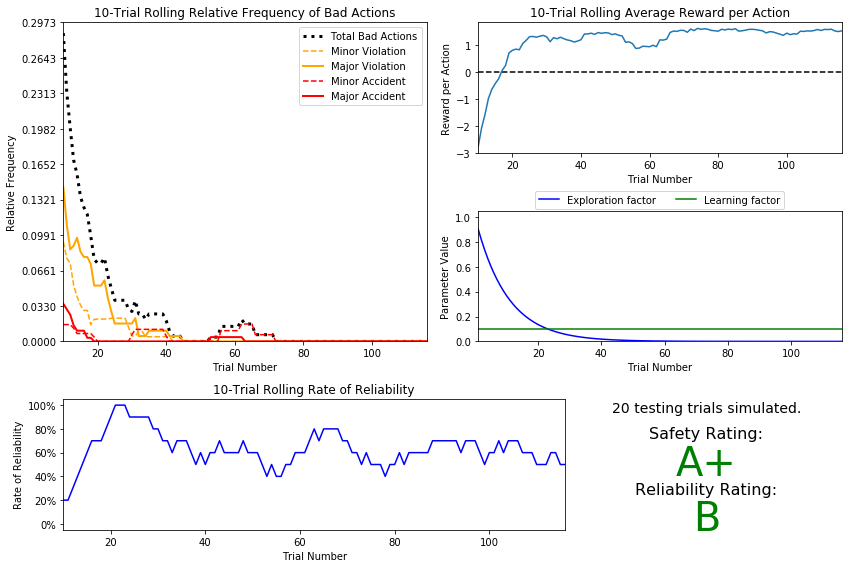

In [43]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation with exponential decay function
vs.plot_trials('sim_improved-learning-exp0.1.csv')
# epsilon=1, alpha=0.1, tolerance=0.0001, n_test=20

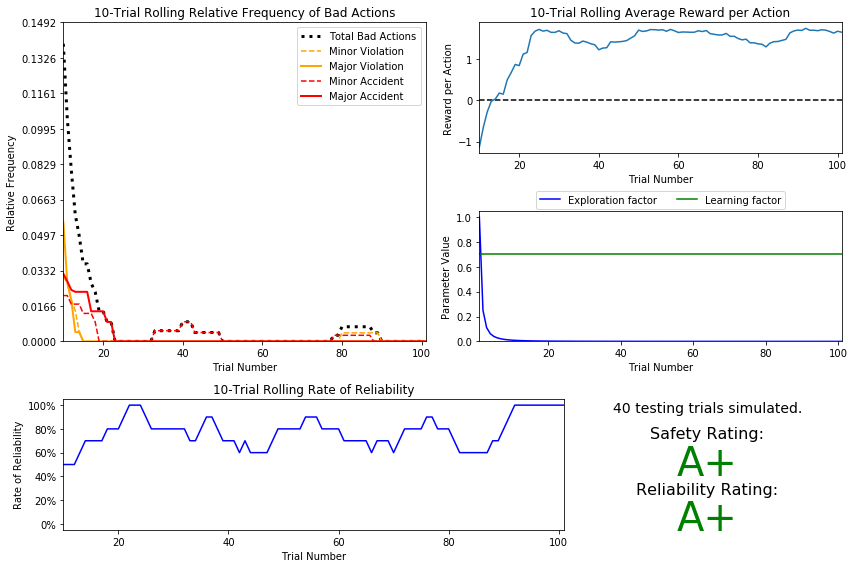

In [34]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation with 3 sensor inputs
vs.plot_trials('sim_improved-learning-tsq3-a0.7.csv')
# epsilon=1, alpha=0.7, tolerance=0.0001, n_test=40

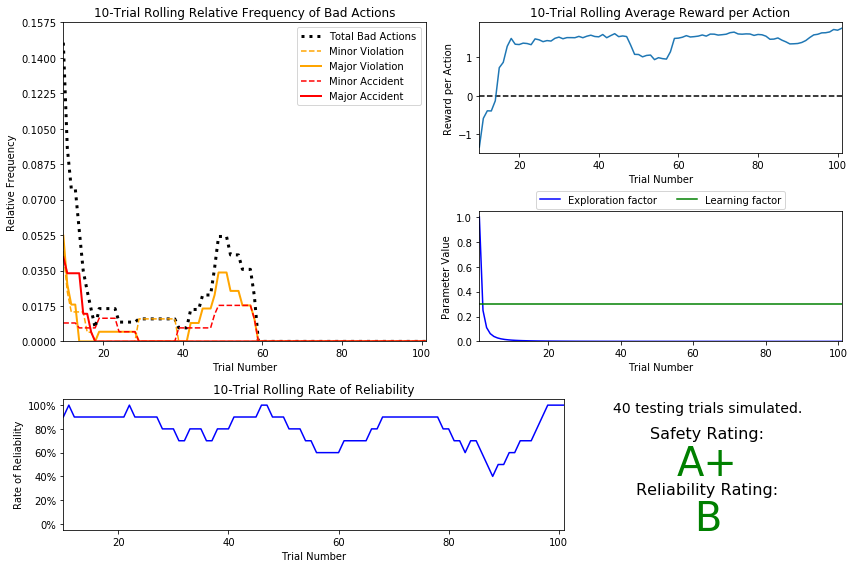

In [41]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation with 3 sensor inputs and alpha 0.3
vs.plot_trials('sim_improved-learning.csv')
# epsilon=1, alpha=0.3, tolerance=0.0001, n_test=40

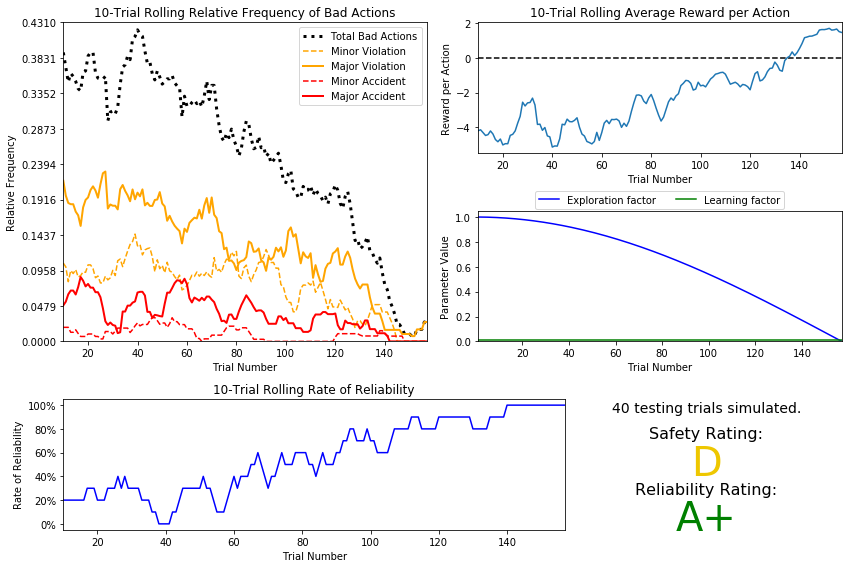

In [40]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation with cosine decay function
vs.plot_trials('sim_improved-learning.csv')
# epsilon=1, alpha=0.01, tolerance=0.01, n_test=40

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**

It is not known which decaying function would perform well. Therefore, I decided to try a couple of options with different parameters to figure out which would lead to optimized waypoint for navigation. I have put all four suggested functions into use and tested their performance.
The number of training required would greatly vary depending on the decaying function and the training parameters. For those fast decaying functions such as power and exponential cause the epsilon to reach tolerance level in just 20 trials or so. Exponential with an alpha of 0.7 and tolerance of 0.0001 can reach the tolerance in less than 20 trials, the minimum required number of training. If a smaller alpha was used,e.g.,0.1, a larger number of training ~110 trials were available. The results could be significantly improved. For 1/t^2, the number of trials only has to do with tolerance. At 0.0001, it took 100 trials to complete training, which helped a lot with finding the optimal policy. As is seen in the last plot for cosine decaying function, if set alpha to a small value, i.e., 0.01, cosine became a slowly decaying function, which took around 150 trials to reach tolerance value. Thus, it has ample number of trials to train the driving agent. However, the bad decision curve indicated rather bumpy features, which might be a sign that training stucked in local minimum and then moved out through random action.
There is an intricate relationship between alpha, tolerance, and the decaying function except for 1/t^2. Power function can have a relatively large alpha to allow for higher tolerance with reasonable number of trials to be able to properly train every states in the state space. For exponential and cosine decaying functions, we will need relatively smaller learning rate with the same level of tolerance to be able to have enough trials to train the driving agent. In the table below, a summary is provided. In short, large alpha and exponential for power function to have enough trials. Small alpha and small tolerance for exponential. small alpha and large tolerance for cosine. It does not matter for 1/t^2 what alpha is.
Compared to default Q-learner, significant improvement was made in terms of safety ratings, rising from F to A or A+ with optimized model. reliability was roughly at the same level varying between A to A+.
Based on the results for driving agent training, I would say that some of the training setups were more successful than others in obtaining an appropriate policy. 1/t^2 may seemed to be most efficient in terms of number of trials and without worrying about alpha. But its performance is somehow less stable compared to power decaying function and exponential.
Overall, I am quite satisfied with the safety and reliability ratings of the Smartcab.




| Test # |  Decaying function | Alpha | Tolerance | Trial #|Sensor inputs| Safety | Reliability |
| :---: | :---: | :---: | :---: | :---: | :---: | :---: |
| 1 | $$\frac{1}{t^2}$$ | 0.7 | 0.0001 |100| 4 | A+ | A |
| 2 | $$ a^t$$ | 0.7 | 0.0001 |23| 4 | F | C |
| 3 | $$ a^t$$ | 0.99 | 0.005 |550| 4 | A+ | A+|
| 4 | $$ e^{-at}$$ | 0.7 | 0.0001 |20| 4 | D | A+ |
| 5 | $$ e^{-at}$$ | 0.1 | 0.0001 |120| 4 | A+ | B |
| 6 | $$ \frac{1}{t^2}$$ | 0.7 | 0.0001 |100| 3 | A+ | A+ |
| 7 | $$ \frac{1}{t^2}$$ | 0.3 | 0.0001 |100| 3 | A+ | B |
| 8 | $$ COS(at)$$ | 0.01 | 0.01 |150| 3 | D | A+ |







### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

**Answer:** 

1. There are two groups of situations when the light is either 'red' or 'green'.
    On 'red' light: the only legitimate move is to take a right turn, depending on the traffic on the direction that the vehicle on the left is taking. If the left vehicle is making through the intersection. It is best to give way to it by staying idle. Otherwise, turn right when the next waypoint is 'right'. In all other situations, remain idle on red light would be considered optimal move;
    On 'green' light: The vehicle makes through intersection with 'forward'. The driving agent can just go ahead and all direction information from 'oncoming','left',or 'right' are irrelevant because the smartcab has the right of the way.
    If the smartcab is instructed to make 'right' turn, the driving agent is also allowed to do so without having to worrying about any other traffics because it again has the right of the way. However, if the oncoming traffic is making a left turn, there is a possibility a minor accident would occur,but the smartcab is not at fault.
    if the smartcab is instructed to make a 'left'turn, then the direction of oncoming traffic becomes critical. if the oncoming traffic is making through the intersection, then the smartcab better off remain idle to not get into major collision. Any other actions the oncoming traffic is taking is not relevant.
    
On green light (for left turn, assume the vehicle wait till the intersection is clear before making turn)

| Waypoint |  Oncoming | Left | Optimal |Suboptimal|
| :---: | :---: | :---: | :---: |:---: |
| left |  forward | N/A | left |N/A|
| left |  none | N/A | left |idle|
| left |  right| N/A | idle |N/A|
| left |  left | N/A | left |N/A|
| right|  left | N/A | idle |right|
| right|  forward,right,none | N/A | right |N/A|
| forward|  left | N/A | forward |idle|

On red light

| Waypoint |  Oncoming | Left | Optimal |Suboptimal|
| :---: | :---: | :---: | :---: |:---: |
| right |  N/A | forward | idle |right|
| left,forward |  N/A | N/A | idle |N/A|

2. In the "sim_improved-learning-pow099.txt", where the driving agent managed to achieve both A+ for safety and efficiency, there is good consistency between each state and the best action, where the Q-value is the maximum. I checked the first 10 recorded states, and they conform to the optimal policy. still, there are some states that are not properly trained. For instance, here is a state where confusion arises.
waypoint, light, oncoming,left

('right', 'green', 'left', 'right')<br>
 -- forward : -0.01<br>
 -- None : 0.00<br>
 -- right : 0.00<br>
 -- left : 0.06<br>
In this situation, the driving agent could take the optimal policy and remain idle because of minor accident will occur if it makes the right turn while oncoming traffic makes left turn. Somehow, the driving agent decided to make a left turn instead.
3. Three random examples:
Directive #1:
waypoint, light, oncoming,left<br>
('left', 'green', 'left', None)<br>
 -- forward : 0.53<br>
 -- None : -4.83<br>
 -- right : 0.18<br>
 -- left : 0.94<br>
 Here, the driving agent is directed to make left on green light. There is oncoming traffic making left at the same time. According to the optimal policy just discussed. Taking left turn is the best choice and the Q value for taking left turn is also the largest.

Directive #2:
waypoint, light, oncoming,left<br>
('forward', 'red', 'forward', 'left')<br>
 -- forward : -10.63<br>
 -- None : 1.57<br>
 -- right : 0.36<br>
 -- left : -10.55<br>
 
Here, the driving agent is instructed to go forward on red. It learnt that going forward or left on red will cause major accidents as evident from the large negative values associated with the two actions. The optimal would be staying idle to wait for green light. The Q value for none is 1.57, which is the largest among four actions.

Directive #3:
waypoint, light, oncoming,left<br>
('right', 'green', 'left', 'left')<br>
 -- forward : 0.02<br>
 -- None : -5.17<br>
 -- right : 1.74<br>
 -- left : 0.00<br>
 When the driving agent is instructed to make to the right on green light.There is oncoming vehicle trying to make a left turn.So it is the oncoming vehicle's job to ensure that the intersection is clear or no traffic is stuck on the direction it is heading. So the driving agent is free to make a right turn.
4. Here I found one intersting state where it seemed that the driving agent is not learing. The smartcab is instructed to move through the intersection. However, instead of going ahead, the vehicle actually made a right turn when vehicle on the left and oncoming directions are all make right turn. Thus, no environment information is preventing it from moving forward. My speculation would be that 1> the state only have one positive value for action 'right', thus it was visited less frequent to reach a legitimate conclusion regarding what are the appropriate action to take. 2>. It could also be possible that, instead of following the waypoint, the driving agent was taking a random choice, which turned out to not violating any of the regulations at the point. Thus, more training may lead to optimal policy in this case.

waypoint, light, oncoming,left<br>
('forward', 'green', 'right', 'right')<br>
 -- forward : 0.00<br>
 -- None : 0.00<br>
 -- right : 0.48<br>
 -- left : 0.00<br>



 
    

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**
I think the smartcab does not have enough information regarding its destination to learn the optimal route. So it is making decisions tyring to minimize traffic infraction and required time to reach destination. This is solely based on waypoint and traffic information at the current intersection. A few steps down the road, the traffic information could be totally different for different test trials. So whatever, the smartcab learnt, might has to be unlearnt to accomodate the new situations. There is no goal with rewards to propagate the rewards back to its start. 
Because the starting point and destinations in the environment changed during each trial. Therefore, the smartcab is driving towards different goals everytime, so the optimal route is dependent on the context where it is driving. Thus, what it learnt about route in one trial might be totally invalid for the next trial. Thus, more training would eventually cause the driving agent to not favor one route over another because the environment is constantly changing over time. Eventually, the Q-values would be not informative because every trial is designed to optimize that specific set of starting to finish routes, which led to averaging out Q-values in certain ways.    


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.